In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.svm import SVR
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [25]:
# Read the csv file
churn_df_train = pd.read_csv("train.csv", delimiter=",")
churn_df_test = pd.read_csv("test.csv", delimiter=",")
churn_df_validation = pd.read_csv("validation.csv", delimiter=",")

In [26]:
# Combining the training data with the test data
churn_df = pd.concat([churn_df_train, churn_df_test], axis=0)

# Reset index if needed
churn_df.reset_index(drop=True, inplace=True)

In [27]:
# Properly formating the column names
churn_df.columns = churn_df.columns.str.lower().str.strip().str.replace(' ', '_')

In [28]:
# Adjust display settings to show all columns
pd.set_option('display.max_columns', None)

In [29]:
churn_df.head()

,age,avg_monthly_gb_download,avg_monthly_long_distance_charges,churn_category,churn_reason,churn_score,city,cltv,contract,country,customer_id,customer_status,dependents,device_protection_plan,gender,internet_service,internet_type,lat_long,latitude,longitude,married,monthly_charge,multiple_lines,number_of_dependents,number_of_referrals,offer,online_backup,online_security,paperless_billing,partner,payment_method,phone_service,population,premium_tech_support,quarter,referred_a_friend,satisfaction_score,senior_citizen,state,streaming_movies,streaming_music,streaming_tv,tenure_in_months,total_charges,total_extra_data_charges,total_long_distance_charges,total_refunds,total_revenue,under_30,unlimited_data,zip_code,churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,4526-ZJJTM,Stayed,0,1,Female,1,Fiber Optic,"37.538309, -122.305109",37.538309,-122.305109,1,88.40,0,0,1,NaN,1,0,0,1,Bank Withdrawal,1,37926,0,Q3,1,3,1,California,1,1,0,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,5302-BDJNT,Stayed,0,1,Male,1,Fiber Optic,"38.432145, -120.77069",38.432145,-120.770690,0,95.50,1,0,0,NaN,0,0,0,0,Bank Withdrawal,1,4610,1,Q3,0,3,0,California,0,0,1,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,5468-BPMMO,Stayed,0,0,Male,0,NaN,"37.007882, -122.065975",37.007882,-122.065975,1,19.60,0,0,3,NaN,0,0,0,1,Bank Withdrawal,1,4563,0,Q3,1,5,0,California,0,0,0,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,2212-LYASK,Stayed,0,1,Male,1,DSL,"33.924143, -117.79387",33.924143,-117.793870,1,45.85,0,0,3,NaN,1,0,1,1,Credit Card,0,1408,0,Q3,1,4,0,California,1,1,0,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,0378-XSZPU,Churned,0,1,Male,1,Cable,"37.311088, -121.961786",37.311088,-121.961786,1,60.30,0,0,1,Offer B,1,1,0,1,Credit Card,1,29914,0,Q3,1,2,0,California,0,0,0,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


In [30]:
# The size of the dataset
churn_df.shape

(5634, 52)

In [9]:
# Information about the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                5634 non-null   int64  
 1   avg_monthly_gb_download            5634 non-null   int64  
 2   avg_monthly_long_distance_charges  5634 non-null   float64
 3   churn_category                     1495 non-null   object 
 4   churn_reason                       1495 non-null   object 
 5   churn_score                        5634 non-null   int64  
 6   city                               5634 non-null   object 
 7   cltv                               5634 non-null   int64  
 8   contract                           5634 non-null   object 
 9   country                            5634 non-null   object 
 10  customer_id                        5634 non-null   object 
 11  customer_status                    5634 non-null   objec

In [10]:
# Descriptive information about object type values
churn_df.describe(include=['O'])

,churn_category,churn_reason,city,contract,country,customer_id,customer_status,gender,internet_type,lat_long,offer,payment_method,quarter,state
count,1495,1495,5634,5634,5634,5634,5634,5634,4440,5634,2548,5634,5634,5634
unique,5,20,1103,3,1,5634,3,2,3,1665,5,3,1,1
top,Competitor,Competitor had better devices,Los Angeles,Month-to-Month,United States,4526-ZJJTM,Stayed,Male,Fiber Optic,"33.362575, -117.299644",Offer B,Bank Withdrawal,Q3,California
freq,655,243,234,2887,5634,1,3776,2827,2442,33,671,3121,5634,5634


In [11]:
# General description of the clients' ages
churn_df['age'].describe()

count    5634.000000
mean       46.492190
std        16.798089
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: age, dtype: float64

In [13]:
# Frequency of each age
churn_df['age'].value_counts()

age
42    126
62    119
47    118
56    118
44    117
     ... 
76     54
80     54
66     49
78     46
72     46
Name: count, Length: 62, dtype: int64

In [12]:
# General description of the churn score
churn_df['churn_score'].describe()

count    5634.000000
mean       58.472311
std        21.162950
min         5.000000
25%        41.000000
50%        61.000000
75%        76.000000
max        96.000000
Name: churn_score, dtype: float64

In [14]:
# Frequency of each city
city_counts = churn_df['city'].value_counts()
city_counts

city
Los Angeles       234
San Diego         224
San Jose           91
San Francisco      86
Sacramento         79
                 ... 
Foothill Ranch      1
Thousand Palms      1
Alturas             1
Alta                1
Loyalton            1
Name: count, Length: 1103, dtype: int64

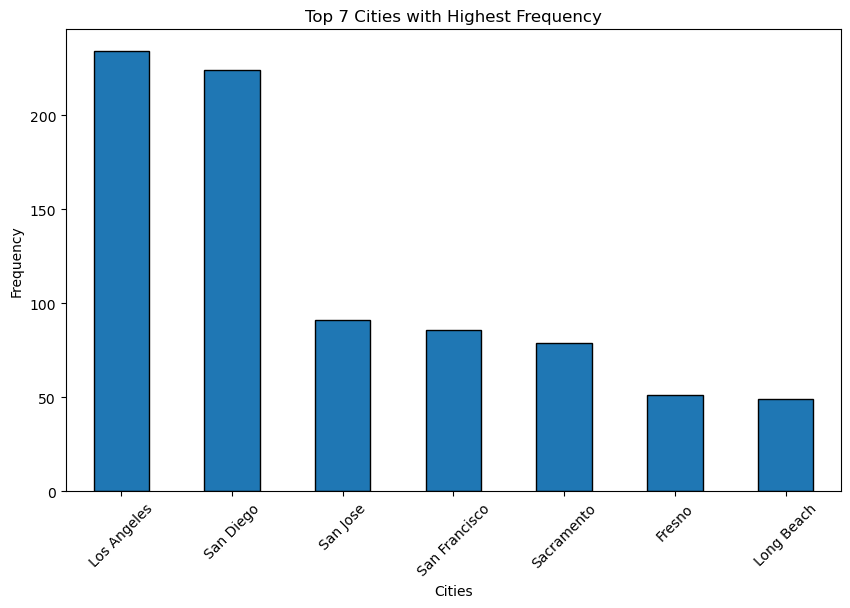

In [15]:
# Select the top 7 cities
top_7_cities = city_counts.head(7)

# Plot the distribution of the top 7 cities
plt.figure(figsize=(10, 6))
top_7_cities.plot(kind='bar', edgecolor='k')
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.title('Top 7 Cities with Highest Frequency')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Counting the values of the target variable 
churn_df['churn'].value_counts()

churn
0    4139
1    1495
Name: count, dtype: int64

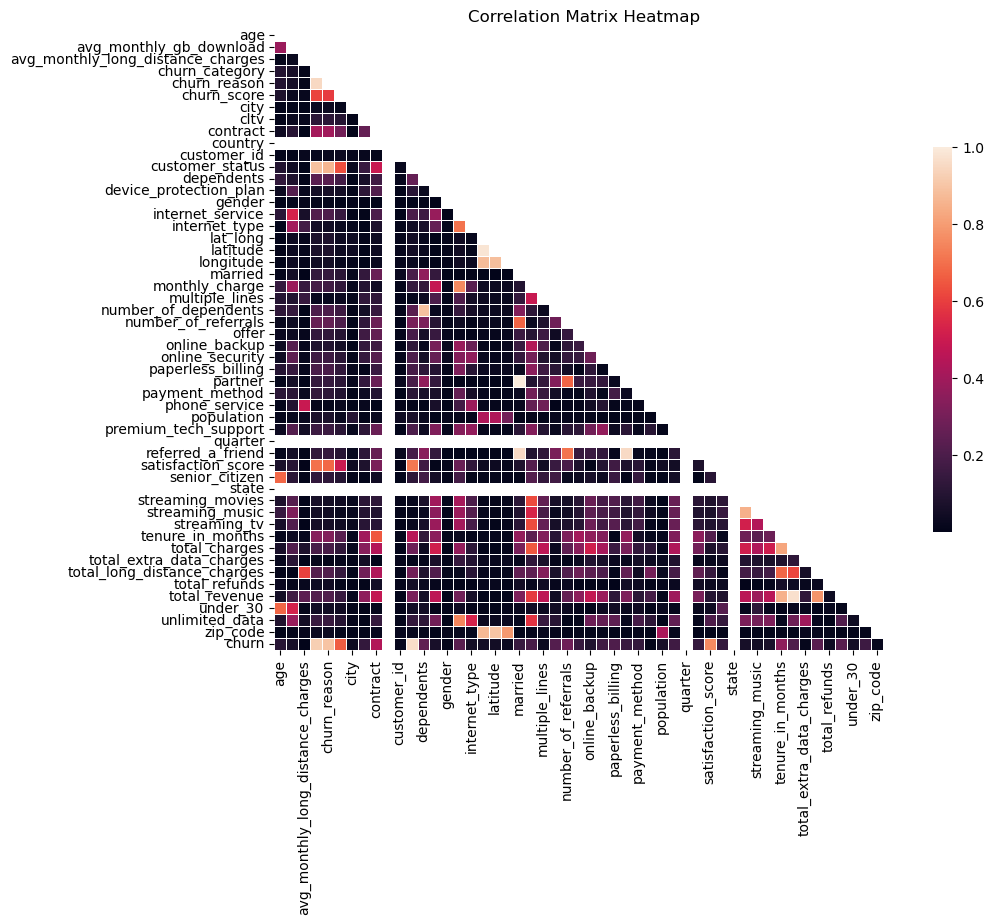

In [17]:
# Assigning numbers to the values
label_encoders = {}
for column in churn_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    churn_df[column] = label_encoders[column].fit_transform(churn_df[column])

# Perform correlation test
corr = np.abs(churn_df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
## Data cleaning

# Replacing every nan value with 'Unknown' using the fillna method
churn_df = churn_df.fillna('Unknown')

# Renaming columns
churn_df = churn_df.rename(columns={'cltv': 'customer_lifetime_value'})

# Dropping duplicates if any
churn_df.drop_duplicates()

# Removing columns with no correlation with the target and high correlation with other columns
columns_to_remove = ['avg_monthly_gb_download', 'avg_monthly_long_distance_charges', 'churn_category', 'churn_reason', 'city', 'country', 'customer_id', 'customer_status', 'device_protection_plan', 'gender', 'internet_type', 'internet_service', 'lat_long', 'latitude', 'longitude', 'number_of_dependents', 'number_of_referrals', 'multiple_lines', 'online_backup', 'partner', 'phone_service', 'population', 'referred_a_friend', 'streaming_movies', 'streaming_tv', 'streaming_music', 'quarter', 'total_long_distance_charges', 'total_charges', 'total_extra_data_charges', 'total_revenue', 'total_refunds', 'senior_citizen', 'state', 'under_30', 'zip_code']
churn_df_cleaned = churn_df.drop(columns=columns_to_remove)

In [19]:
churn_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5634 non-null   int64  
 1   churn_score              5634 non-null   int64  
 2   customer_lifetime_value  5634 non-null   int64  
 3   contract                 5634 non-null   int32  
 4   dependents               5634 non-null   int64  
 5   married                  5634 non-null   int64  
 6   monthly_charge           5634 non-null   float64
 7   offer                    5634 non-null   int32  
 8   online_security          5634 non-null   int64  
 9   paperless_billing        5634 non-null   int64  
 10  payment_method           5634 non-null   int32  
 11  premium_tech_support     5634 non-null   int64  
 12  satisfaction_score       5634 non-null   int64  
 13  tenure_in_months         5634 non-null   int64  
 14  unlimited_data          

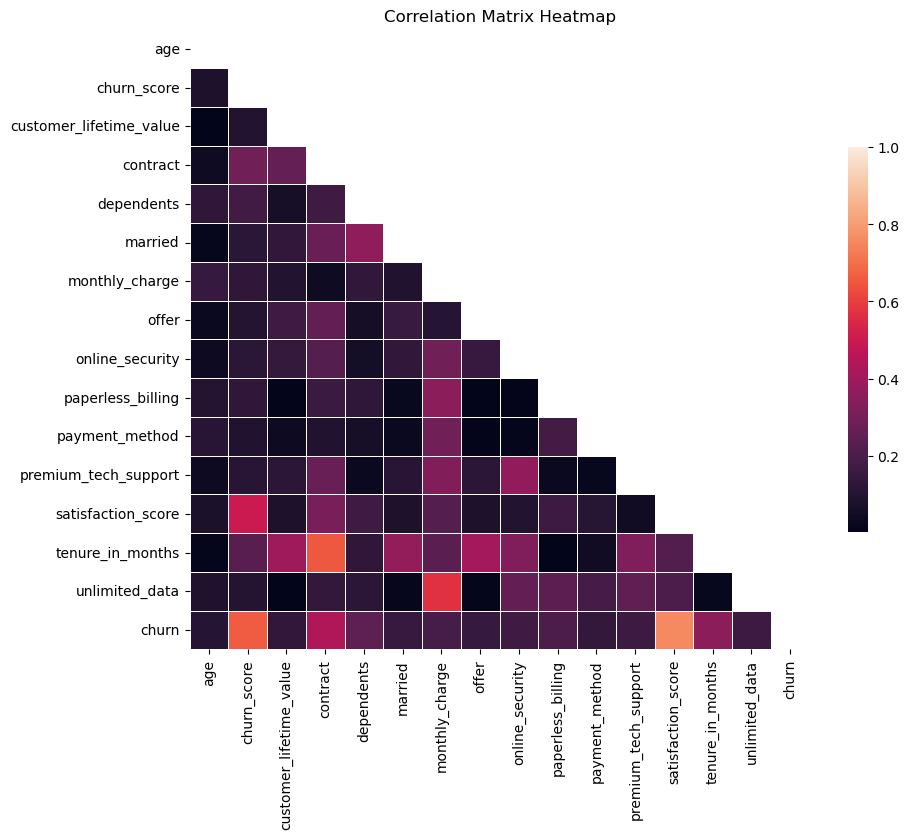

In [20]:
# Correlation test
corr = np.abs(churn_df_cleaned.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
# Defining the features and target
features = churn_df_cleaned.drop(columns = ["churn"])
target = churn_df_cleaned["churn"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [22]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Evaluating KNN model
knn.score(X_test, y_test)

0.8482697426796806

In [23]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9733806566104702
Precision: 0.9506578947368421
Recall: 0.9506578947368421
F1 Score: 0.9506578947368421


In [24]:
# Bagging and Pasting
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, max_samples = 1000)
bagging_class.fit(X_train, y_train)
y_pred_bagging = bagging_class.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9813664596273292
Precision: 0.9930313588850174
Recall: 0.9375
F1 Score: 0.964467005076142


In [25]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, max_samples=1000)

random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9795918367346939
Precision: 1.0
Recall: 0.9243421052631579
F1 Score: 0.9606837606837606


In [26]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=10, subsample=0.8)

gradient_boosting.fit(X_train, y_train)

y_pred_boosting = gradient_boosting.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_boosting)
precision = precision_score(y_test, y_pred_boosting)
recall = recall_score(y_test, y_pred_boosting)
f1 = f1_score(y_test, y_pred_boosting)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9804791481810116
Precision: 0.9731543624161074
Recall: 0.9539473684210527
F1 Score: 0.9634551495016611


In [27]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

# Train the classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = adaboost.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9751552795031055
Precision: 0.956953642384106
Recall: 0.9506578947368421
F1 Score: 0.9537953795379539


In [28]:
# SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train a model
model = RandomForestClassifier()
model.fit(X_train_res, y_train_res)

# Make predictions
y_pred_smote = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9804791481810116
Precision: 0.9828767123287672
Recall: 0.944078947368421
F1 Score: 0.9630872483221476


In [29]:
## Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'base_estimator__max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 150],
    'max_samples': [500, 1000, 1500],
    'bootstrap': [True, False]
}

# Initialize the BaggingClassifier with DecisionTreeClassifier
bagging_class = BaggingClassifier(DecisionTreeClassifier(), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_class, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_bagging_class = grid_search.best_estimator_

# Save the best model to a file
joblib.dump(best_bagging_class, 'best_bagging_model.joblib')

# Predict on the test set
y_pred_bagging = best_bagging_class.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:905: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best parameters found:  {'base_estimator__max_depth': 10, 'bootstrap': False, 'max_samples': 1000, 'n_estimators': 150}
Accuracy: 0.9813664596273292
Precision: 0.9896193771626297
Recall: 0.9407894736842105
F1 Score: 0.9645868465430016


In [48]:
# Validate my model using the validation dataset
churn_df_validation.head()

,age,avg_monthly_gb_download,avg_monthly_long_distance_charges,churn_category,churn_reason,churn_score,city,customer_lifetime_value,contract,country,customer_id,customer_status,dependents,device_protection_plan,gender,internet_service,internet_type,lat_long,latitude,longitude,married,monthly_charge,multiple_lines,number_of_dependents,number_of_referrals,offer,online_backup,online_security,paperless_billing,partner,payment_method,phone_service,population,premium_tech_support,quarter,referred_a_friend,satisfaction_score,senior_citizen,state,streaming_movies,streaming_music,streaming_tv,tenure_in_months,total_charges,total_extra_data_charges,total_long_distance_charges,total_refunds,total_revenue,under_30,unlimited_data,zip_code,churn
0,43,4,29.19,Unknown,Unknown,58,Indio,5614,Month-to-Month,United States,5312-UXESG,Stayed,0,1,Female,1,Fiber Optic,"33.752938, -116.230055",33.752938,-116.230055,0,98.05,1,0,0,Offer B,0,0,0,0,Bank Withdrawal,1,2743,0,Q3,0,4,0,California,1,1,1,41,3990.60,0,1196.79,0.0,5187.39,0,1,92203,0
1,59,19,0.00,Unknown,Unknown,23,Santa Maria,6300,One Year,United States,9581-GVBXT,Stayed,1,1,Male,1,DSL,"34.818227, -120.418784",34.818227,-120.418784,1,34.80,0,2,0,Offer B,0,1,0,1,Credit Card,0,37364,0,Q3,0,4,0,California,0,0,0,59,1980.30,0,0.00,0.0,1980.30,0,1,93455,0
2,46,6,26.81,Unknown,Unknown,39,Oakhurst,5135,Two Year,United States,6211-WWLTF,Stayed,0,1,Male,1,Fiber Optic,"37.648647, -119.231447",37.648647,-119.231447,1,99.70,0,0,3,Offer B,0,1,0,1,Credit Card,1,8521,0,Q3,1,3,0,California,1,1,1,63,6330.40,0,1689.03,0.0,8019.43,0,1,93644,0
3,61,6,41.79,Unknown,Unknown,39,San Francisco,2051,One Year,United States,0297-RBCSG,Stayed,0,0,Male,1,DSL,"37.791222, -122.402241",37.791222,-122.402241,0,65.35,0,0,0,Unknown,1,0,1,0,Bank Withdrawal,1,384,1,Q3,0,4,0,California,1,1,0,19,1231.85,60,794.01,0.0,2085.86,0,0,94104,0
4,50,0,40.25,Unknown,Unknown,57,Salinas,5983,Month-to-Month,United States,8713-IGZSO,Joined,0,0,Male,0,Unknown,"36.722898, -121.633648",36.722898,-121.633648,0,24.85,1,0,0,Offer E,0,0,0,0,Credit Card,1,53946,0,Q3,0,3,0,California,0,0,0,2,62.00,0,80.50,0.0,142.50,0,0,93906,0


In [31]:
# Properly formating the column names
churn_df_validation.columns = churn_df_validation.columns.str.lower().str.strip().str.replace(' ', '_')

# Replacing every nan value with 'Unknown' using the fillna method
churn_df_validation = churn_df_validation.fillna('Unknown')

# Renaming columns
churn_df_validation = churn_df_validation.rename(columns={'cltv': 'customer_lifetime_value'})

# Dropping duplicates if any
churn_df_validation.drop_duplicates()

# Removing unnecessary columns
columns_to_remove = ['avg_monthly_gb_download', 'avg_monthly_long_distance_charges', 'churn_category', 'churn_reason', 'city', 'country', 'customer_id', 'customer_status', 'device_protection_plan', 'gender', 'internet_type', 'internet_service', 'lat_long', 'latitude', 'longitude', 'number_of_dependents', 'number_of_referrals', 'multiple_lines', 'online_backup', 'partner', 'phone_service', 'population', 'referred_a_friend', 'streaming_movies', 'streaming_tv', 'streaming_music', 'quarter', 'total_long_distance_charges', 'total_charges', 'total_extra_data_charges', 'total_revenue', 'total_refunds', 'senior_citizen', 'state', 'under_30', 'zip_code']
churn_df_validation_cleaned = churn_df_validation.drop(columns=columns_to_remove)

# Assign numbers to the values
label_encoders = {}
for column in churn_df_validation_cleaned.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    churn_df_validation_cleaned[column] = label_encoders[column].fit_transform(churn_df_validation_cleaned[column])

In [53]:
# Load the saved model from the file
best_bagging_class = joblib.load('best_bagging_model.joblib')

# Separate the features and target in the validation data
X_validation = churn_df_validation_cleaned.drop(columns=['churn'])
y_validation = churn_df_validation_cleaned['churn']

# Ensure that the columns in the validation set match those in the training set
X_validation = X_validation[X_train.columns]

# Predict churn for each record in the validation set
y_pred_validation = best_bagging_class.predict(X_validation)

# Add the predictions back to the validation DataFrame
churn_df_validation_cleaned['predicted_churn'] = y_pred_validation

# Create a column to indicate whether each prediction was correct
churn_df_validation_cleaned['correct_prediction'] = churn_df_validation_cleaned['predicted_churn'] == churn_df_validation_cleaned['churn']

# Display the correct and incorrect predictions
churn_df_validation_cleaned['correct_prediction'].value_counts()

correct_prediction
True     1384
False      25
Name: count, dtype: int64

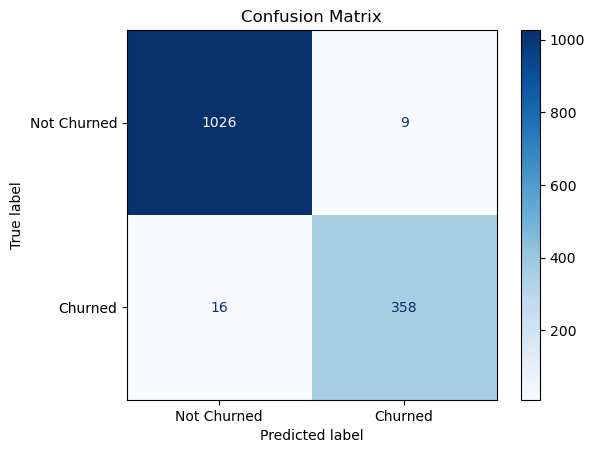

In [41]:
# Calculate the confusion matrix
cm = confusion_matrix(y_validation, y_pred_validation)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Confusion matrix values
TN = 1026
FP = 9
FN = 16
TP = 358

# Calculate metrics
accuracy = (TN + TP) / (TN + FP + FN + TP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.9823
Precision: 0.9755
Recall: 0.9572
F1 Score: 0.9663


In [63]:
# Displaying the wrong predictions' records
incorrect_predictions = churn_df_validation_cleaned[churn_df_validation_cleaned['correct_prediction'] == False]

# Display the incorrect predictions
incorrect_predictions

,age,churn_score,customer_lifetime_value,contract,dependents,married,monthly_charge,offer,online_security,paperless_billing,payment_method,premium_tech_support,satisfaction_score,tenure_in_months,unlimited_data,churn,predicted_churn,correct_prediction
28,19,79,6484,2,0,1,25.15,1,0,1,1,0,3,56,0,1,0,False
130,52,74,4856,0,0,0,45.55,3,1,1,1,1,3,13,1,1,0,False
221,35,80,5437,0,1,0,19.25,5,0,0,1,0,3,1,0,1,0,False
301,58,67,3099,0,0,1,97.10,1,0,1,0,0,3,40,1,1,0,False
352,40,68,2362,1,0,1,19.85,4,0,0,2,0,3,2,0,1,0,False
455,47,71,2054,0,0,0,81.90,5,0,1,1,0,3,13,1,0,1,False
487,60,76,4430,0,0,0,89.25,4,0,1,0,1,3,6,1,0,1,False
539,34,67,3075,0,0,1,84.95,5,0,1,0,0,3,16,1,1,0,False
559,25,78,3797,0,1,1,20.55,5,0,0,1,0,3,1,0,1,0,False
637,41,74,5882,0,0,0,54.65,5,0,1,0,0,3,1,1,0,1,False


Further analysis can be done with these records.